NYC data in Mollewide

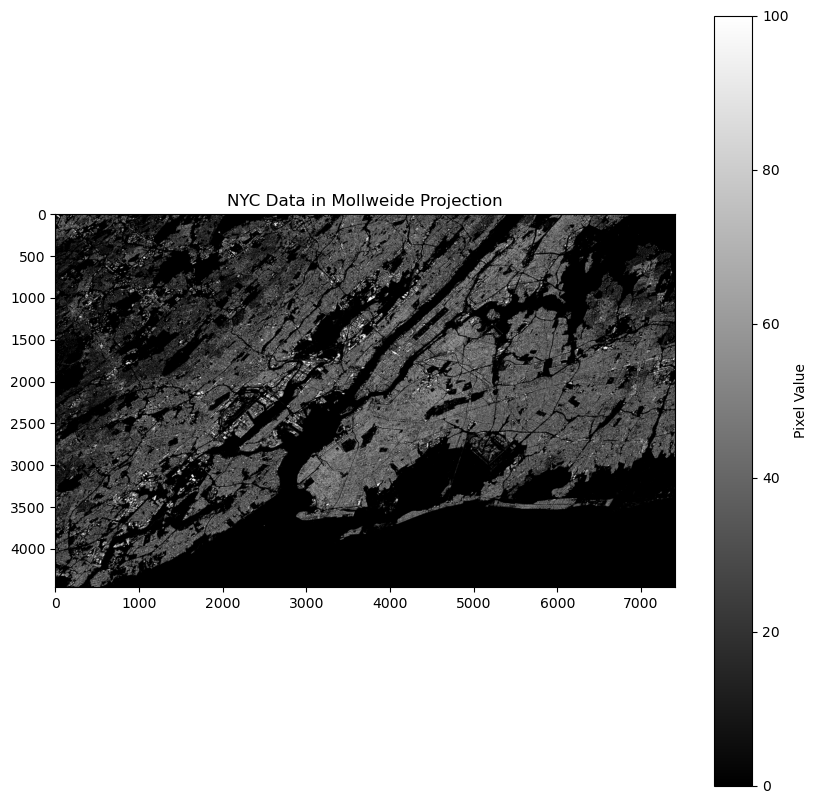

Minimum Value: 0
Maximum Value: 100


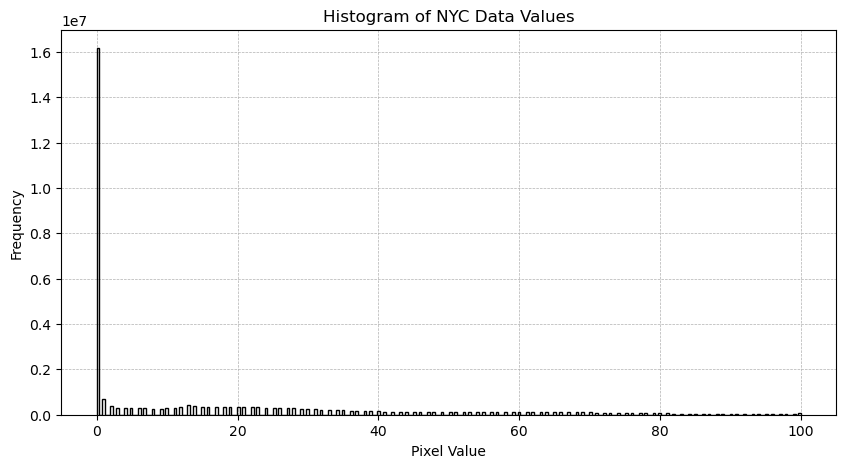

Coordinate Reference System (CRS): ESRI:54009
Bounding Box: BoundingBox(left=-6281018.675379993, bottom=4845216.944553853, right=-6206928.675379993, top=4889746.944553853)


In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster data
with rasterio.open('nyc_original.tif') as src:
    data = src.read(1)  # As it's a single band image
    crs = src.crs
    bbox = src.bounds

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title('NYC Data in Mollweide Projection')
plt.show()

# Print minimum and maximum values
print(f"Minimum Value: {data.min()}")
print(f"Maximum Value: {data.max()}")

# Show histogram
plt.figure(figsize=(10, 5))
plt.hist(data.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of NYC Data Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Print the coordinate reference system and bounding box
print(f"Coordinate Reference System (CRS): {crs}")
print(f"Bounding Box: {bbox}")

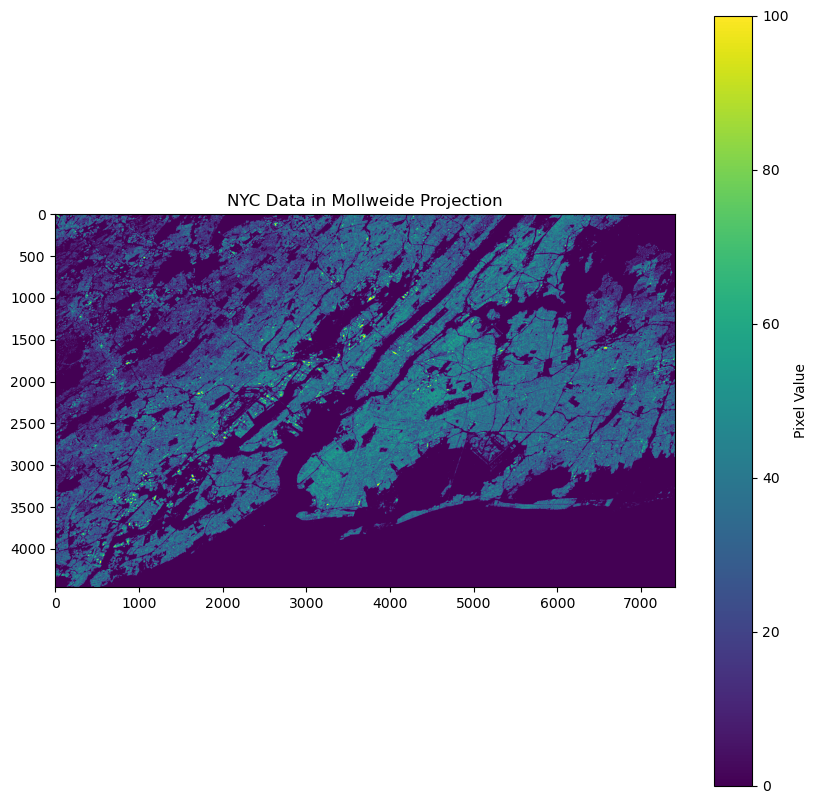

Minimum Value: 0
Maximum Value: 100


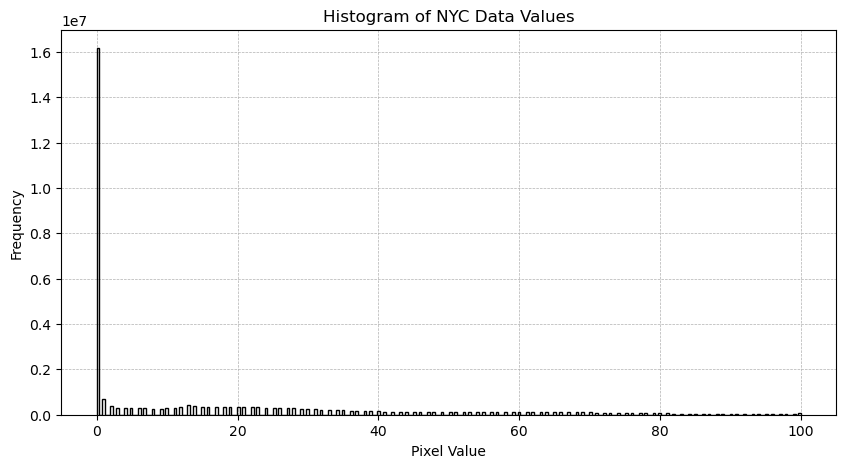

Coordinate Reference System (CRS): ESRI:54009
Bounding Box: BoundingBox(left=-6281018.675379993, bottom=4845216.944553853, right=-6206928.675379993, top=4889746.944553853)


In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster data
with rasterio.open('nyc_original.tif') as src:
    data = src.read(1)  # Assuming it's a single band image. Adjust if not.
    crs = src.crs
    bbox = src.bounds

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='viridis')  # Using the 'viridis' colormap
plt.colorbar(label='Pixel Value')
plt.title('NYC Data in Mollweide Projection')
plt.show()

# Print minimum and maximum values
print(f"Minimum Value: {data.min()}")
print(f"Maximum Value: {data.max()}")

# Show histogram
plt.figure(figsize=(10, 5))
plt.hist(data.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of NYC Data Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Print the coordinate reference system and bounding box
print(f"Coordinate Reference System (CRS): {crs}")
print(f"Bounding Box: {bbox}")


### Transform the NYC data from Mollewide to WGS84

In [3]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

input_file = 'nyc_original.tif'
output_file = 'nyc_transformed.tif'

# Define the target CRS
dst_crs = 'EPSG:4326'

with rasterio.open(input_file) as src:
    # Calculate the transform and dimensions for the new dataset
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    
    # Define metadata for the new dataset
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Reproject and write to the new dataset
    with rasterio.open(output_file, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)
            
# Open the transformed dataset and discard the the values above 100
with rasterio.open(output_file, 'r+') as dst:
    data = dst.read(1)
    
    # Clamp the values
    np.clip(data, original_min, original_max, out=data)

    # Write the clamped data back to the dataset
    dst.write(data, 1)

print(f"Dataset has been transformed and saved to {output_file}")

Dataset has been transformed and saved to nyc_transformed.tif


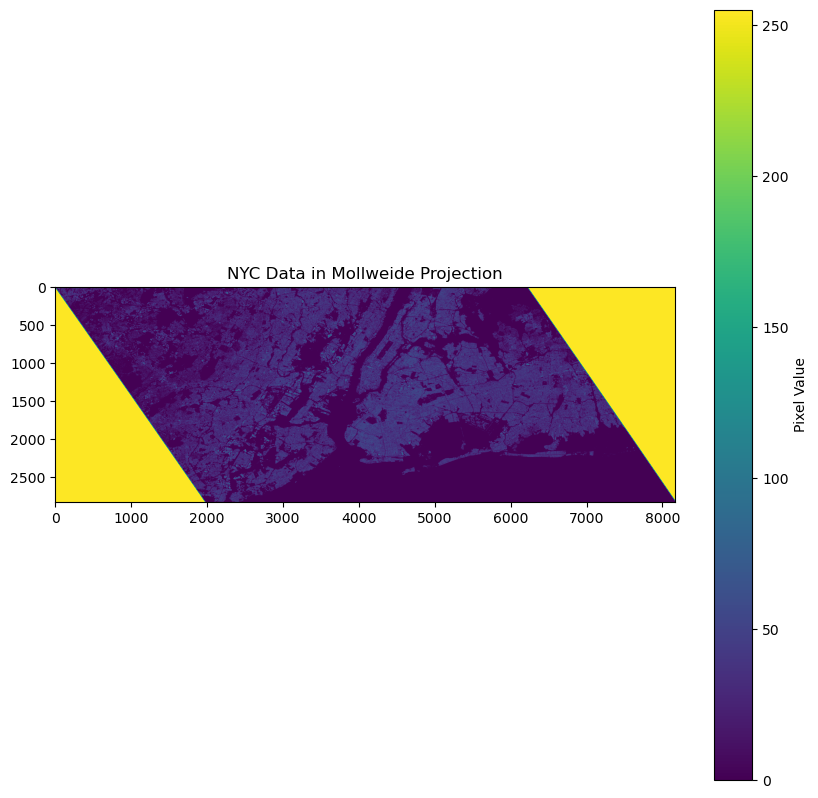

Minimum Value: 0
Maximum Value: 255


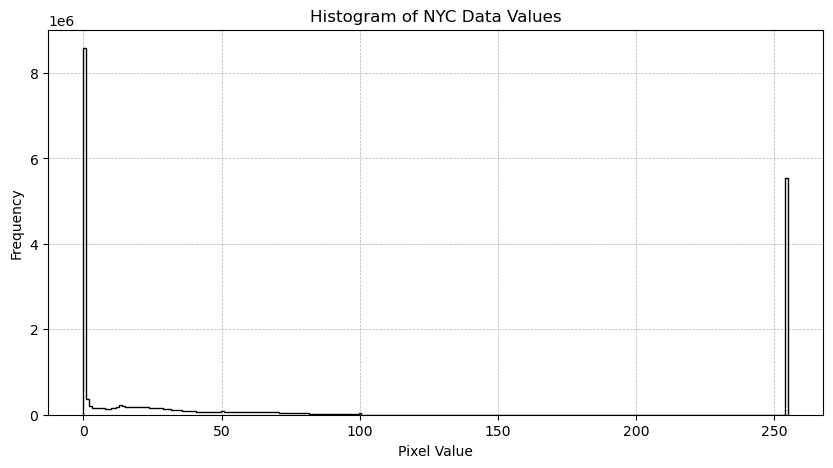

Coordinate Reference System (CRS): EPSG:4326
Bounding Box: BoundingBox(left=-74.57982955087145, bottom=40.5000300255436, right=-73.42365307481565, top=40.89999999999993)


In [4]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster data
with rasterio.open('nyc_transformed.tif') as src:
    data = src.read(1)  # Assuming it's a single band image. Adjust if not.
    crs = src.crs
    bbox = src.bounds

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='viridis')  # Using the 'viridis' colormap
plt.colorbar(label='Pixel Value')
plt.title('NYC Data in Mollweide Projection')
plt.show()

# Print minimum and maximum values
print(f"Minimum Value: {data.min()}")
print(f"Maximum Value: {data.max()}")

# Show histogram
plt.figure(figsize=(10, 5))
plt.hist(data.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of NYC Data Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Print the coordinate reference system and bounding box
print(f"Coordinate Reference System (CRS): {crs}")
print(f"Bounding Box: {bbox}")


In [5]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

input_file = 'nyc_original.tif'
output_file = 'nyc_transformed.tif'

# Load the original data to get its min and max values
with rasterio.open(input_file) as src:
    original_data = src.read(1)
    original_min = original_data.min()
    original_max = original_data.max()

    # Define the transformation to WGS84
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height
    })

    # Perform the reprojection
    with rasterio.open(output_file, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs='EPSG:4326',
                resampling=Resampling.bilinear
            )

# Open the transformed dataset and clamp the values
with rasterio.open(output_file, 'r+') as dst:
    data = dst.read(1)
    
    # Clamp the values
    np.clip(data, original_min, original_max, out=data)

    # Write the clamped data back to the dataset
    dst.write(data, 1)

print(f"Values in {output_file} have been clamped between {original_min} and {original_max}")

Values in nyc_transformed.tif have been clamped between 0 and 100


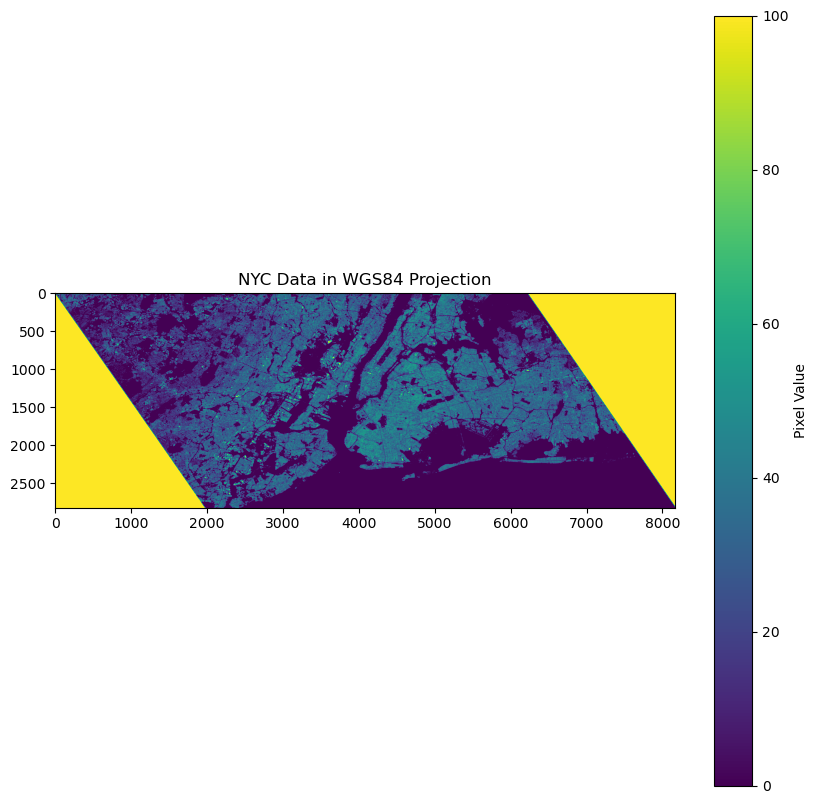

Minimum Value: 0
Maximum Value: 100


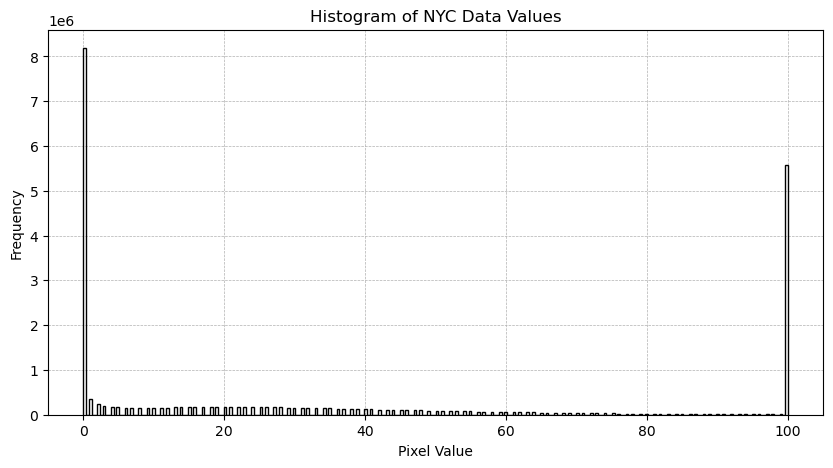

Coordinate Reference System (CRS): EPSG:4326
Bounding Box: BoundingBox(left=-74.57982955087145, bottom=40.5000300255436, right=-73.42365307481565, top=40.89999999999993)


In [7]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster data
with rasterio.open('nyc_transformed.tif') as src:
    data = src.read(1)  # Assuming it's a single band image. Adjust if not.
    crs = src.crs
    bbox = src.bounds

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='viridis')  # Using the 'viridis' colormap
plt.colorbar(label='Pixel Value')
plt.title('NYC Data in WGS84 Projection')
plt.show()

# Print minimum and maximum values
print(f"Minimum Value: {data.min()}")
print(f"Maximum Value: {data.max()}")

# Show histogram
plt.figure(figsize=(10, 5))
plt.hist(data.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of NYC Data Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Print the coordinate reference system and bounding box
print(f"Coordinate Reference System (CRS): {crs}")
print(f"Bounding Box: {bbox}")
